# Loading data into python

In this section, we are taking a look at loading data into python. We will talk about some general data formats and discuss strategies to get data out of e.g. instrument control software and into your evaluation scripts.

We will look at the following file types in this chapter:

1. tabulated data in text files
2. MS Excel and LibreOffice Calc

## tabulated data in text files ("CSV")

The category of tabulated data in text files is pretty loosely defined, and there are not really any standards for it. I am going to use the term "CSV" here pretty loosely for any type of human readable tabulated data, even though it actually is an abbreviation for one specific type of format of "comma separated values".

In general CSVs consist of rows of data encoded in a human readable format (e.g. ASCII, unicode). There is some delimiter character that separates rows and a new line to separate columns. Delimiter characters are typically `,`, but `;`, spaces or tabs are also commonly used. In some files the first row describes the data contained in each column. Sometimes, there is a header that describes the contents of the file (e.g. measurement parameters, date, time and so on). 

To import CSVs into python, there are several functions. We will focus on `numpy.genfromtxt` and `pandas.read_csv` here. The main difference here is, that `numpy.genfromtxt` outputs a numpy array, while `pandas.read_csv` outputs a pandas `DataFrame`. You can use `genfromtxt` for data that is mostly numerical, whereas `read_csv` works well for mixed data, but is potentially less performant.

When importing a CSV, we need to first check the following info:

1. What data do we expect?
2. Which delimiter is used?
3. What is the line number of the first table row?
4. Are there commments or a header?
5. Is the number format "weird"? (E.g. `,` instead of `.` for decimal seperator)
6. Do rows contain text data?

The best way to check these is to use a text editor. Unfortunately, the default editor in Windows "Notepad" is really bad. Instead, you can download "Notepad ++" or "Programmer's Notebook" or use Jupyter to open text files. Just click on the file name in the Jupyter file browser.

When using Notepad ++, you can turn on showing white space in the "View>Show Symbol>White Space and TAB" menu.

Let's have a look at an example for such a CSV file, "data/64-17-5-IR.csv". Since we are not sure what the file looks like, we have to check using an editor. Here are the first few lines of the file as they appear in Notepad++:

![screenshot of notepad++](figures/loading_data/64-17-5-IR_csv.png)

**1. What data do we expect?**

This file contains an infrared spectrum in a column shape. The first column contains the wavenumber axis, the second column contains the absorption values.

**2. What is the delimiter?**

The orange arrows are how the program shows TABs when show white spaces is enabled. So our delimiters are TABs.

**3. What is the line number of the first table row?**

From the screen shot above, we also see that the first line contains a header. The data starts in the second line.

**4. Are there commments or a header?**

There are no comments but the first line contains column headers.

**5. Is the number format "weird"?**

No, there is nothing unexpected in the number format.

**6. Do rows contain text data?**

No.

Now, we are ready to import the file. Since the delimiter here is a white space character (TAB), we don't have to specify it in the call to `genfromtxt`. That is covered by the default arguments. If we wanted to specify TAB explicitly, we would use the optional argument `delimiter='\t'`.

The row containing data is in the second line of the file, hence we pass the optional argument `skip_header=1`. The number format consists of integers and there is no text data:

In [1]:
import numpy as np

loaded_data = np.genfromtxt(fname="data/64-17-5-IR.csv", skip_header=1)
loaded_data

array([[4.500e+02, 1.670e-02],
       [4.540e+02, 4.506e-02],
       [4.580e+02, 5.056e-02],
       ...,
       [3.958e+03, 5.493e-03],
       [3.962e+03, 5.156e-03],
       [3.966e+03, 4.260e-03]])

The returned array has the same shape as the table in the CSV file. We can get individual entries using indexing:

In [ ]:
loaded_data[1,1]

We can also adress rows using either just the first index

In [2]:
loaded_data[0]

array([4.50e+02, 1.67e-02])

or the first index and a colon for the second index:

In [3]:
loaded_data[0,:]

array([4.50e+02, 1.67e-02])

We can also select columns using the colon for the first index and a number for the second index

In [4]:
loaded_data[:,0]

array([ 450.,  454.,  458.,  462.,  466.,  470.,  474.,  478.,  482.,
        486.,  490.,  494.,  498.,  502.,  506.,  510.,  514.,  518.,
        522.,  526.,  530.,  534.,  538.,  542.,  546.,  550.,  554.,
        558.,  562.,  566.,  570.,  574.,  578.,  582.,  586.,  590.,
        594.,  598.,  602.,  606.,  610.,  614.,  618.,  622.,  626.,
        630.,  634.,  638.,  642.,  646.,  650.,  654.,  658.,  662.,
        666.,  670.,  674.,  678.,  682.,  686.,  690.,  694.,  698.,
        702.,  706.,  710.,  714.,  718.,  722.,  726.,  730.,  734.,
        738.,  742.,  746.,  750.,  754.,  758.,  762.,  766.,  770.,
        774.,  778.,  782.,  786.,  790.,  794.,  798.,  802.,  806.,
        810.,  814.,  818.,  822.,  826.,  830.,  834.,  838.,  842.,
        846.,  850.,  854.,  858.,  862.,  866.,  870.,  874.,  878.,
        882.,  886.,  890.,  894.,  898.,  902.,  906.,  910.,  914.,
        918.,  922.,  926.,  930.,  934.,  938.,  942.,  946.,  950.,
        954.,  958.,

If we are going to look at column wise data most of the time, it is shorter to use the `unpack=True` optional argument. This loads the data and then transposes it:

In [50]:
loaded_data = np.genfromtxt(fname="data/64-17-5-IR.csv",
                            skip_header=1,
                            unpack=True)
loaded_data

array([[4.500e+02, 4.540e+02, 4.580e+02, ..., 3.958e+03, 3.962e+03,
        3.966e+03],
       [1.670e-02, 4.506e-02, 5.056e-02, ..., 5.493e-03, 5.156e-03,
        4.260e-03]])

Now we can select columns in the file using the first index:

In [51]:
loaded_data[0]

array([ 450.,  454.,  458.,  462.,  466.,  470.,  474.,  478.,  482.,
        486.,  490.,  494.,  498.,  502.,  506.,  510.,  514.,  518.,
        522.,  526.,  530.,  534.,  538.,  542.,  546.,  550.,  554.,
        558.,  562.,  566.,  570.,  574.,  578.,  582.,  586.,  590.,
        594.,  598.,  602.,  606.,  610.,  614.,  618.,  622.,  626.,
        630.,  634.,  638.,  642.,  646.,  650.,  654.,  658.,  662.,
        666.,  670.,  674.,  678.,  682.,  686.,  690.,  694.,  698.,
        702.,  706.,  710.,  714.,  718.,  722.,  726.,  730.,  734.,
        738.,  742.,  746.,  750.,  754.,  758.,  762.,  766.,  770.,
        774.,  778.,  782.,  786.,  790.,  794.,  798.,  802.,  806.,
        810.,  814.,  818.,  822.,  826.,  830.,  834.,  838.,  842.,
        846.,  850.,  854.,  858.,  862.,  866.,  870.,  874.,  878.,
        882.,  886.,  890.,  894.,  898.,  902.,  906.,  910.,  914.,
        918.,  922.,  926.,  930.,  934.,  938.,  942.,  946.,  950.,
        954.,  958.,

And we can plot the loaded data in matplotlib:

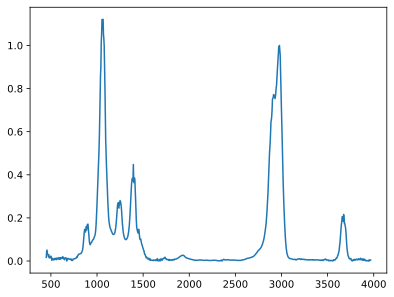

In [52]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(loaded_data[0], loaded_data[1])

Of course, we can also read this csv file into Pandas (even though that might be overkill here). In `pd.read_csv` the first line of the table is assumed to be the header by default. This is used to name the columns. `read_csv` by default asssumes `,` as delimiter. Hence, we need to specify that a TAB was used explicitly.

In [53]:
import pandas as pd

pd_loaded_data = pd.read_csv("data/64-17-5-IR.csv", delimiter="\t")
pd_loaded_data

wavenumber  absorption
0           450    0.016700
1           454    0.045060
2           458    0.050560
3           462    0.035760
4           466    0.030710
..          ...         ...
875        3950    0.000000
876        3954    0.002578
877        3958    0.005493
878        3962    0.005156
879        3966    0.004260

[880 rows x 2 columns]

`pd.read_csv` returns a pandas `DataFrame`. Here, we can select columns using a `.` and the column name

In [54]:
pd_loaded_data.wavenumber

0       450
1       454
2       458
3       462
4       466
       ... 
875    3950
876    3954
877    3958
878    3962
879    3966
Name: wavenumber, Length: 880, dtype: int64

We can also use the square bracket `[]` indexing we are already familiar with:

In [55]:
pd_loaded_data["absorption"]

0      0.016700
1      0.045060
2      0.050560
3      0.035760
4      0.030710
         ...   
875    0.000000
876    0.002578
877    0.005493
878    0.005156
879    0.004260
Name: absorption, Length: 880, dtype: float64

And of course, plotting works as well:

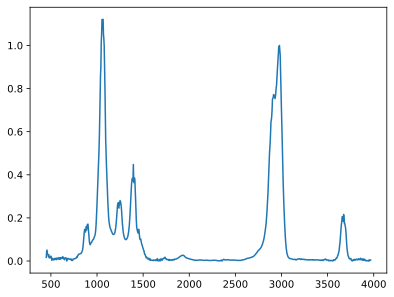

In [56]:
fig1 = plt.figure()
ax = fig1.add_subplot()
ax.plot(pd_loaded_data.wavenumber, pd_loaded_data.absorption)

To get a specific element in a `DataFrame` or all values in a row, we need to use one of the several indecing methods. The most important ones are `.loc` and `.iloc`. 

`.loc` is for label based indexing, meaning we need to use the "labels" of rows and columns to select. These can be seen when we display the `DataFrame`:

In [57]:
pd_loaded_data

wavenumber  absorption
0           450    0.016700
1           454    0.045060
2           458    0.050560
3           462    0.035760
4           466    0.030710
..          ...         ...
875        3950    0.000000
876        3954    0.002578
877        3958    0.005493
878        3962    0.005156
879        3966    0.004260

[880 rows x 2 columns]

Labels here appear in bold font. For rows, they are an increasing integer index, for columns, they are column names. So, to select the absorption value in the first row, we type the following:

In [58]:
pd_loaded_data.loc[0,"absorption"]

0.0167

`.iloc` is for integer position based indexing. This behaves like a numpy array. To select the absorption value in the first row using `.iloc` we type:

In [59]:
pd_loaded_data.iloc[0,1]

0.0167

Since pandas is more flexible and powerful in loading data than numpy, it is important to note, that pandas data frames can be converted to numpy arrays by using their `.to_numpy()` method. Thus, we can make use of pandas to load data and then convert to numpy for calculations:

In [60]:
pd_loaded_data.to_numpy()

array([[4.500e+02, 1.670e-02],
       [4.540e+02, 4.506e-02],
       [4.580e+02, 5.056e-02],
       ...,
       [3.958e+03, 5.493e-03],
       [3.962e+03, 5.156e-03],
       [3.966e+03, 4.260e-03]])

Let's have a look at another real world example. Here, I am using the current air quality measurement for the city of Vienna as provided by  [data.gv.at](https://www.data.gv.at/katalog/dataset/d9ae1245-158e-4d79-86a4-2d9b3defbedc). It can be downloaded from [here](https://go.gv.at/l9lumesakt). Again, here is a screen shot of the file:

![screenshot of notepad lumes](figures/loading_data/lumes.PNG)

Let's go through the check list again:

1. **What data do we expect?** The meaning of each columns is explained on [data.gv.at](https://www.data.gv.at/katalog/dataset/d9ae1245-158e-4d79-86a4-2d9b3defbedc). 
> Air quality data (ozone (O3), nitrogen dioxide (NO2), nitrogen oxides (NOx), particulate matter (PM10 and PM2,5), sulfur dioxide (SO2), carbon monixide (CO)) from 17 stationary measuring points. The data originates from continuous measurements and is available in the form of half-hourly mean values which are updated every 30 minutes. 
2. **Which delimiter is used?** The semicolon.
3. **What is the line number of the first table row?** The first data containing line is number 5.
4. **Are there commments or a header?** There are multiple headers, from line 2 to 4.
5. **Is the number format "weird"? (E.g. `,` instead of `.` for decimal seperator))?** Yes, `,` instead of `.`.
6. **Do rows contain text data?** Some cells do, others contain times and dates.

The complex nature of this file means we are probably better off using pandas right away instead of trying our luck with numpy. Let's give it a try:

In [61]:
lumes = pd.read_csv("data/lumesakt-v2.csv", 
                    delimiter=";", 
                    header=[1,2,3])

Unfortunately, this fails for some reason. Python tells us, that there is a `UnicodeDecodeError`. To understand that, we need to take a step back. Remember, when we talked about computers representing everything as ones and zeroes and the meaning of series of ones and zeros (or bytes) being just up to convention? The same is also true for (text) files. For text files, the convention used to interpret it's contents are called "encoding" or "codec". UTF-8 is one such codec and it is used as default in `read_csv`.  

Unfortunately, even though the description of the file on data.gv.at claims the data is "utf8", it is not. To find out which encoding was actually used, we can again use our editor. For example in Notepad++ the encoding is shown in the "Encoding" menu. Here, we see that "ANSI" encoding might have been used in this file. We can pass that as an optional argument.

In [62]:
lumes = pd.read_csv("data/lumesakt-v2.csv", 
                    delimiter=";",
                    header=[1,2,3],
                   encoding="iso-8859-1")
lumes

Unnamed: 0_level_0           Zeit-LTM    LTM          Zeit-Wind     WG  \
   Unnamed: 0_level_1 Unnamed: 1_level_1    HMW Unnamed: 3_level_1    HMW   
   Unnamed: 0_level_2               MESZ     °C               MESZ   km/h   
0                STEF  18.02.2021, 13:30     NE  18.02.2021, 13:30     NE   
1                 TAB  18.02.2021, 13:30     NE  18.02.2021, 13:30   2,74   
2                 AKA  18.02.2021, 13:30   9,95  18.02.2021, 13:30   9,03   
3                 AKC  18.02.2021, 13:30     NE  18.02.2021, 13:30     NE   
4                BELG  18.02.2021, 13:30     NE  18.02.2021, 13:30     NE   
5                 LAA  18.02.2021, 13:30     NE  18.02.2021, 13:30   5,58   
6                  KE  18.02.2021, 13:30  11,55  18.02.2021, 13:30   6,16   
7                 A23  18.02.2021, 13:30  10,59  18.02.2021, 13:30   2,09   
8                GAUD  18.02.2021, 13:30  11,08  18.02.2021, 13:30     NE   
9                 MBA  18.02.2021, 13:30     NE  18.02.2021, 13:30     NE   
10               KEND  18.02.2021, 13:30     NE  18.02.2021, 13:30   6,73   
11               SCHA  18.02.2021, 13:30     NE  18.02.2021, 13:30   6,20   
12               JAEG  18.02.2021, 13:30  10,49  18.02.2021, 13:30  10,81   
13                 ZA  18.02.2021, 13:30     NE  18.02.2021, 13:30     NE   
14                FLO  18.02.2021, 13:30     NE  18.02.2021, 13:30     NE   
15                LOB  18.02.2021, 13:30  10,74  18.02.2021, 13:30   6,01   
16               STAD  18.02.2021, 13:30     NE  18.02.2021, 13:30   6,37   
17               LIES  18.02.2021, 13:30     NE  18.02.2021, 13:30   9,91   
18               BC21  18.02.2021, 13:30  10,35  18.02.2021, 13:30  10,05   

        WR            Zeit-RF     RF           Zeit-NO2    NO2  ...  PM25  \
       HMW Unnamed: 6_level_1    HMW Unnamed: 8_level_1    HMW  ...  MW24   
         °               MESZ      %               MESZ  µg/m³  ... µg/m³   
0       NE  18.02.2021, 13:30     NE  18.02.2021, 13:30  17,57  ...    NE   
1   307,79  18.02.2021, 13:30     NE  18.02.2021, 13:30  38,02  ...  9,09   
2    86,57  18.02.2021, 13:30  67,41  18.02.2021, 13:30     NE  ...    NE   
3       NE  18.02.2021, 13:30     NE  18.02.2021, 13:30  17,18  ...  7,63   
4       NE  18.02.2021, 13:30     NE  18.02.2021, 13:30  35,30  ...  8,52   
5   122,36  18.02.2021, 13:30     NE  18.02.2021, 13:30     NE  ...  7,88   
6    69,71  18.02.2021, 13:30  52,67  18.02.2021, 13:30  17,30  ...  8,88   
7   165,87  18.02.2021, 13:30  52,83  18.02.2021, 13:30  17,20  ...  8,06   
8       NE  18.02.2021, 13:30  55,57  18.02.2021, 13:30  43,93  ...  7,90   
9       NE  18.02.2021, 13:30     NE  18.02.2021, 13:30  54,88  ...    NE   
10   94,39  18.02.2021, 13:30     NE  18.02.2021, 13:30  27,83  ...  6,88   
11  104,98  18.02.2021, 13:30     NE  18.02.2021, 13:00  15,02  ...  4,40   
12  130,05  18.02.2021, 13:30  55,03  18.02.2021, 13:30  10,58  ...    NE   
13      NE  18.02.2021, 13:30     NE  18.02.2021, 13:30  12,52  ...    NE   
14      NE  18.02.2021, 13:30     NE  18.02.2021, 13:30  14,56  ...  5,85   
15   73,36  18.02.2021, 13:30  53,98  18.02.2021, 13:30   4,96  ...  5,17   
16   13,98  18.02.2021, 13:30     NE  18.02.2021, 13:30  11,43  ...  7,74   
17  114,79  18.02.2021, 13:30     NE  18.02.2021, 13:30  25,04  ...  7,62   
18  107,78  18.02.2021, 13:30  57,76  18.02.2021, 13:30     NE  ...    NE   

                      Zeit-O3     O3                   Zeit-SO2   SO2  \
      HMW Unnamed: 18_level_1    1MW    HMW Unnamed: 21_level_1   HMW   
    µg/m³                MESZ  µg/m³  µg/m³                MESZ µg/m³   
0      NE   18.02.2021, 13:30  53,93  56,58   18.02.2021, 13:30  2,33   
1   10,45   18.02.2021, 13:30     NE     NE   18.02.2021, 13:30    NE   
2      NE   18.02.2021, 13:30     NE     NE   18.02.2021, 13:30    NE   
3    8,95   18.02.2021, 13:30     NE     NE   18.02.2021, 13:30    NE   
4   10,91   18.02.2021, 13:30     NE     NE   18.02.2021, 13:30    NE   
5    7,90   18.02.2021, 13:30

There are still some things that seem a bit fishy. First of all, there are quite a few instances of the string "NE" in the parsed table. "NE" probably stands for values that were either not available or not determined. We need to tell python to ignore these or rather set them to `nan`.

Second, there are also columns still containing the`,` as decimal separator. Since python always represents the decimal separator as `.` it seems these have not been parsed correctly. They are still represented as strings. To be sure, let's check the type of one of these values:

In [63]:
lumes.loc[1, "WG"]

HMW  km/h    2,74
Name: 1, dtype: object

Unfortunately, that doesn't look gread. The dtype of this value is stated to be "object". A generic, catch all type that tells us, `read_csv` had no idea what to do with the data. Let's check the other data types:

In [64]:
lumes.dtypes

Unnamed: 0_level_0  Unnamed: 0_level_1   Unnamed: 0_level_2    object
Zeit-LTM            Unnamed: 1_level_1   MESZ                  object
LTM                 HMW                  °C                    object
Zeit-Wind           Unnamed: 3_level_1   MESZ                  object
WG                  HMW                  km/h                  object
WR                  HMW                  °                     object
Zeit-RF             Unnamed: 6_level_1   MESZ                  object
RF                  HMW                  %                     object
Zeit-NO2            Unnamed: 8_level_1   MESZ                  object
NO2                 HMW                  µg/m³                 object
Zeit-NOX            Unnamed: 10_level_1  MESZ                  object
NOX                 HMW                  µg/m³                 object
Zeit-PM10           Unnamed: 12_level_1  MESZ                  object
PM10                MW24                 µg/m³                 object
                    

Again, dtype is object. So that didn't work either. 

We need to refine the arguments passed to `read_csv` a bit to actually get meaningful data here. Looking at the documentation of the function, we see several optional arguments that could be helpful.

> **na_values** : scalar, str, list-like, or dict, optional
>
>    Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.

    
> **decimal** : str, default ‘.’
>
>    Character to recognize as decimal point (e.g. use ‘,’ for European data).

> **parse_dates** : bool or list of int or names or list of lists or dict, default False
>    The behavior is as follows:
>
>    * boolean. If True -> try parsing the index.
>    * list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3
>      each as a separate date column.
>    * list of lists. e.g.  If [[1, 3]] -> combine columns 1 and 3 and parse as
>      a single date column.
>    * dict, e.g. {'foo' : [1, 3]} -> parse columns 1, 3 as date and call
>      result 'foo'

In [65]:
lumes = pd.read_csv("data/lumesakt-v2.csv", 
                    delimiter=";",
                    na_values="NE",
                    decimal=",",
                    parse_dates=[1,3,6,8,10,12,15,18,21,23],
                    header=[1,2,3],
                    encoding="iso-8859-1")
lumes

Unnamed: 0_level_0            Zeit-LTM    LTM           Zeit-Wind     WG  \
   Unnamed: 0_level_1  Unnamed: 1_level_1    HMW  Unnamed: 3_level_1    HMW   
   Unnamed: 0_level_2                MESZ     °C                MESZ   km/h   
0                STEF 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
1                 TAB 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   2.74   
2                 AKA 2021-02-18 13:30:00   9.95 2021-02-18 13:30:00   9.03   
3                 AKC 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
4                BELG 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
5                 LAA 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   5.58   
6                  KE 2021-02-18 13:30:00  11.55 2021-02-18 13:30:00   6.16   
7                 A23 2021-02-18 13:30:00  10.59 2021-02-18 13:30:00   2.09   
8                GAUD 2021-02-18 13:30:00  11.08 2021-02-18 13:30:00    NaN   
9                 MBA 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
10               KEND 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   6.73   
11               SCHA 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   6.20   
12               JAEG 2021-02-18 13:30:00  10.49 2021-02-18 13:30:00  10.81   
13                 ZA 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
14                FLO 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
15                LOB 2021-02-18 13:30:00  10.74 2021-02-18 13:30:00   6.01   
16               STAD 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   6.37   
17               LIES 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   9.91   
18               BC21 2021-02-18 13:30:00  10.35 2021-02-18 13:30:00  10.05   

        WR             Zeit-RF     RF            Zeit-NO2    NO2  ...  PM25  \
       HMW  Unnamed: 6_level_1    HMW  Unnamed: 8_level_1    HMW  ...  MW24   
         °                MESZ      %                MESZ  µg/m³  ... µg/m³   
0      NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  17.57  ...   NaN   
1   307.79 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  38.02  ...  9.09   
2    86.57 2021-02-18 13:30:00  67.41 2021-02-18 13:30:00    NaN  ...   NaN   
3      NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  17.18  ...  7.63   
4      NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  35.30  ...  8.52   
5   122.36 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN  ...  7.88   
6    69.71 2021-02-18 13:30:00  52.67 2021-02-18 13:30:00  17.30  ...  8.88   
7   165.87 2021-02-18 13:30:00  52.83 2021-02-18 13:30:00  17.20  ...  8.06   
8      NaN 2021-02-18 13:30:00  55.57 2021-02-18 13:30:00  43.93  ...  7.90   
9      NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  54.88  ...   NaN   
10   94.39 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  27.83  ...  6.88   
11  104.98 2021-02-18 13:30:00    NaN 2021-02-18 13:00:00  15.02  ...  4.40   
12  130.05 2021-02-18 13:30:00  55.03 2021-02-18 13:30:00  10.58  ...   NaN   
13     NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  12.52  ...   NaN   
14     NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  14.56  ...  5.85   
15   73.36 2021-02-18 13:30:00  53.98 2021-02-18 13:30:00   4.96  ...  5.17   
16   13.98 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  11.43  ...  7.74   
17  114.79 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  25.04  ...  7.62   
18  107.78 2021-02-18 13:30:00  57.76 2021-02-18 13:30:00    NaN  ...   NaN   

                      Zeit-O3     O3                   Zeit-SO2   SO2  \
      HMW Unnamed: 18_level_1    1MW    HMW Unnamed: 21_level_1   HMW   
    µg/m³                MESZ  µg/m³  µg/m³                MESZ µg/m³   
0     NaN 2021-02-18 13:30:00  53.93  56.58 2021-02-18 13:30:00  2.33   
1   10.45 2021-02-18 13:30:00    NaN    NaN 2021-02-18 13:30:00   NaN   
2     NaN 2021-02-18 13:30:00    NaN    NaN 2021-02-18 13:30:00   NaN   
3    8.95 2021-02-18 13:30:00    NaN    NaN 2021-02-18 13:30:00   NaN   
4   10.91 2021

Let's check again if all columns are now recognized correctly:

In [66]:
lumes.dtypes

Unnamed: 0_level_0  Unnamed: 0_level_1   Unnamed: 0_level_2            object
Zeit-LTM            Unnamed: 1_level_1   MESZ                  datetime64[ns]
LTM                 HMW                  °C                           float64
Zeit-Wind           Unnamed: 3_level_1   MESZ                  datetime64[ns]
WG                  HMW                  km/h                         float64
WR                  HMW                  °                            float64
Zeit-RF             Unnamed: 6_level_1   MESZ                  datetime64[ns]
RF                  HMW                  %                            float64
Zeit-NO2            Unnamed: 8_level_1   MESZ                  datetime64[ns]
NO2                 HMW                  µg/m³                        float64
Zeit-NOX            Unnamed: 10_level_1  MESZ                  datetime64[ns]
NOX                 HMW                  µg/m³                        float64
Zeit-PM10           Unnamed: 12_level_1  MESZ                  d

Everything that has "Zeit" (for "time") in its name is a `datetime64`, everything else is `float64`. Except for "Unnamed", which contains strings encoding the location of each measurement point. Let's rename it.

In [67]:
lumes = lumes.rename(columns={"Unnamed: 0_level_0":"Standort"})
lumes

Standort            Zeit-LTM    LTM           Zeit-Wind     WG  \
   Unnamed: 0_level_1  Unnamed: 1_level_1    HMW  Unnamed: 3_level_1    HMW   
   Unnamed: 0_level_2                MESZ     °C                MESZ   km/h   
0                STEF 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
1                 TAB 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   2.74   
2                 AKA 2021-02-18 13:30:00   9.95 2021-02-18 13:30:00   9.03   
3                 AKC 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
4                BELG 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
5                 LAA 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   5.58   
6                  KE 2021-02-18 13:30:00  11.55 2021-02-18 13:30:00   6.16   
7                 A23 2021-02-18 13:30:00  10.59 2021-02-18 13:30:00   2.09   
8                GAUD 2021-02-18 13:30:00  11.08 2021-02-18 13:30:00    NaN   
9                 MBA 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
10               KEND 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   6.73   
11               SCHA 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   6.20   
12               JAEG 2021-02-18 13:30:00  10.49 2021-02-18 13:30:00  10.81   
13                 ZA 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
14                FLO 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN   
15                LOB 2021-02-18 13:30:00  10.74 2021-02-18 13:30:00   6.01   
16               STAD 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   6.37   
17               LIES 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00   9.91   
18               BC21 2021-02-18 13:30:00  10.35 2021-02-18 13:30:00  10.05   

        WR             Zeit-RF     RF            Zeit-NO2    NO2  ...  PM25  \
       HMW  Unnamed: 6_level_1    HMW  Unnamed: 8_level_1    HMW  ...  MW24   
         °                MESZ      %                MESZ  µg/m³  ... µg/m³   
0      NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  17.57  ...   NaN   
1   307.79 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  38.02  ...  9.09   
2    86.57 2021-02-18 13:30:00  67.41 2021-02-18 13:30:00    NaN  ...   NaN   
3      NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  17.18  ...  7.63   
4      NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  35.30  ...  8.52   
5   122.36 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00    NaN  ...  7.88   
6    69.71 2021-02-18 13:30:00  52.67 2021-02-18 13:30:00  17.30  ...  8.88   
7   165.87 2021-02-18 13:30:00  52.83 2021-02-18 13:30:00  17.20  ...  8.06   
8      NaN 2021-02-18 13:30:00  55.57 2021-02-18 13:30:00  43.93  ...  7.90   
9      NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  54.88  ...   NaN   
10   94.39 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  27.83  ...  6.88   
11  104.98 2021-02-18 13:30:00    NaN 2021-02-18 13:00:00  15.02  ...  4.40   
12  130.05 2021-02-18 13:30:00  55.03 2021-02-18 13:30:00  10.58  ...   NaN   
13     NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  12.52  ...   NaN   
14     NaN 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  14.56  ...  5.85   
15   73.36 2021-02-18 13:30:00  53.98 2021-02-18 13:30:00   4.96  ...  5.17   
16   13.98 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  11.43  ...  7.74   
17  114.79 2021-02-18 13:30:00    NaN 2021-02-18 13:30:00  25.04  ...  7.62   
18  107.78 2021-02-18 13:30:00  57.76 2021-02-18 13:30:00    NaN  ...   NaN   

                      Zeit-O3     O3                   Zeit-SO2   SO2  \
      HMW Unnamed: 18_level_1    1MW    HMW Unnamed: 21_level_1   HMW   
    µg/m³                MESZ  µg/m³  µg/m³                MESZ µg/m³   
0     NaN 2021-02-18 13:30:00  53.93  56.58 2021-02-18 13:30:00  2.33   
1   10.45 2021-02-18 13:30:00    NaN    NaN 2021-02-18 13:30:00   NaN   
2     NaN 2021-02-18 13:30:00    NaN    NaN 2021-02-18 13:30:00   NaN   
3    8.95 2021-02-18 13:30:00    NaN    NaN 2021-02-18 13:30:00   NaN   
4   10.91 2021-02-18 13:

We can now use this dataframe to check where the highest value of a parameter, e.g. the PM25 particle count, was recorded. 

In [68]:
lumes.Standort.iloc[lumes.PM25.HMW.idxmax()]

Unnamed: 0_level_1
  Unnamed: 0_level_2
8               GAUD

GAUD is the abreviation of a station in [Gaudzendorf](https://www.wien.gv.at/umwelt/luft/messstellen/gaudenzdorf.html), right next to the Gürtel.

## MS Excel and LibreOffice Calc

One option to load data from an Excel / LO Calc file is to export it as CSV, of course. However, pandas also has the capability to directly import from the native formats of these programs. The function to use is `pandas.read_excel`. 

The example we are going to look at now consists of multi sheet excel file that is used to keep track of a process parameters in a mineral water plant. The upper an lower limits of ion concentration is given by Austrian law - minimum levels are required to still call the product "Mineralwasser", maximum levels have to be kept for safety and public health reasons. (The data set is entirely artificial).

For each quarter, once a week a sample is take and analyzed via ion chromatography. The values are then copied by a lab technician into an Excel sheet and checked by the manager of the plant lab. Results are compiled by quarter and archived. The sheet for a quarter looks like this:

![screenshot of spreadsheet](figures/loading_data/xlsx.png)

We have four columns containing data, and some additional meta data. Let's have a look at the documentation of the `pd.read_excel` function to figure out how to call it:

In [69]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel._base:

read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, mangle_dupe_cols=True, storage_options: Optional[Dict[str, Any]] = None)
    Read an Excel file into a pandas DataFrame.
    
    Supports `xls`, `xlsx`, `xlsm`, `xlsb`, `odf`, `ods` and `odt` file extensions
    read from a local filesystem or URL. Supports an option to read
    a single sheet or a list of sheets.
    
    Parameters
    ----------
    io : str, bytes, ExcelFile, xlrd.Book, path object, or file-like object
        Any valid string path is acceptable. The string could be a URL. Valid
        URL schemes include http, ftp, s3, and file. For fil

`io` is the path to our file.The first row of our data set (the header) is in line 9 (therefore `skiprows` is 8). 


In [70]:
xlsxsheet = pd.read_excel("data/mineralwasser.xls",
              skiprows=8)
xlsxsheet

Datum  Ca [mg/L]  Mg [mg/L] Messung
0  2020-01-01      160.2       54.5    Miri
1  2020-01-08      158.1       54.1    Miri
2  2020-01-15      157.7       53.6    Miri
3  2020-01-22      159.5       54.6    Miri
4  2020-01-29      169.2       58.5   Seppl
5  2020-02-05      168.9       58.1   Seppl
6  2020-02-12  IC defekt  IC defekt     NaN
7  2020-02-19        169       58.4   Seppl
8  2020-02-26      161.8       55.8    Miri
9  2020-03-04      159.6       55.1    Miri
10 2020-03-11      160.7       55.3    Miri
11 2020-03-18      161.3       55.5    Miri
12 2020-03-25      159.7       55.5    Miri

This looks nice, but we run into a similar problem as with CSV files:

There is one day here, where the IC was broken. Since all data types in a column need to be the same, pandas defaults to the least common denominator between strings and floats, the generic "object". We will add the string "IC defekt" to the list of `na_values` to make sure pandas transcribes these columns correctly.


In [71]:
xlsxsheet["Ca [mg/L]"]

0         160.2
1         158.1
2         157.7
3         159.5
4         169.2
5         168.9
6     IC defekt
7           169
8         161.8
9         159.6
10        160.7
11        161.3
12        159.7
Name: Ca [mg/L], dtype: object

In [28]:
xlsxsheet = pd.read_excel("data/mineralwasser.xls",
              skiprows=8,
            na_values="IC defekt"
                         )
xlsxsheet

Datum  Ca [mg/L]  Mg [mg/L] Messung
0  2020-01-01      160.2       54.5    Miri
1  2020-01-08      158.1       54.1    Miri
2  2020-01-15      157.7       53.6    Miri
3  2020-01-22      159.5       54.6    Miri
4  2020-01-29      169.2       58.5   Seppl
5  2020-02-05      168.9       58.1   Seppl
6  2020-02-12        NaN        NaN     NaN
7  2020-02-19      169.0       58.4   Seppl
8  2020-02-26      161.8       55.8    Miri
9  2020-03-04      159.6       55.1    Miri
10 2020-03-11      160.7       55.3    Miri
11 2020-03-18      161.3       55.5    Miri
12 2020-03-25      159.7       55.5    Miri

Now, we only have one sheet loaded, but there are three sheets in our data set. Pandas has the optional argument `sheet_name` that accepts a list of sheet names.   We can also pass `None` there to get all sheets.
 

In [29]:
xlsxsheets = pd.read_excel("data/mineralwasser.xls",
              skiprows=8,
              na_values="IC defekt",
              sheet_name=None)
xlsxsheets

{'Q1':         Datum  Ca [mg/L]  Mg [mg/L] Messung
 0  2020-01-01      160.2       54.5    Miri
 1  2020-01-08      158.1       54.1    Miri
 2  2020-01-15      157.7       53.6    Miri
 3  2020-01-22      159.5       54.6    Miri
 4  2020-01-29      169.2       58.5   Seppl
 5  2020-02-05      168.9       58.1   Seppl
 6  2020-02-12        NaN        NaN     NaN
 7  2020-02-19      169.0       58.4   Seppl
 8  2020-02-26      161.8       55.8    Miri
 9  2020-03-04      159.6       55.1    Miri
 10 2020-03-11      160.7       55.3    Miri
 11 2020-03-18      161.3       55.5    Miri
 12 2020-03-25      159.7       55.5    Miri,
 'Q2':         Datum  Ca [mg/L]  Mg [mg/L] Messung
 0  2020-04-01      154.9       53.3   Seppl
 1  2020-04-08      161.1       54.8   Seppl
 2  2020-04-15      158.7       55.0    Miri
 3  2020-04-22      159.6       55.2    Miri
 4  2020-04-29      159.3       54.8    Miri
 5  2020-05-06      159.6       55.1    Miri
 6  2020-05-13      160.3       55.1    Mi

This results in a dictionary containing DataFrames (because pandas can't rely on the fact that all sheets in an Excel file will have the same columns). We have to merge them manually. Doing so for the dictionary uses the dictionary keys (the sheet names) as part of a two level index:

In [30]:
ion_dataset = pd.concat(xlsxsheets, axis=0)
ion_dataset

Datum  Ca [mg/L]  Mg [mg/L] Messung
Q1 0  2020-01-01      160.2       54.5    Miri
   1  2020-01-08      158.1       54.1    Miri
   2  2020-01-15      157.7       53.6    Miri
   3  2020-01-22      159.5       54.6    Miri
   4  2020-01-29      169.2       58.5   Seppl
   5  2020-02-05      168.9       58.1   Seppl
   6  2020-02-12        NaN        NaN     NaN
   7  2020-02-19      169.0       58.4   Seppl
   8  2020-02-26      161.8       55.8    Miri
   9  2020-03-04      159.6       55.1    Miri
   10 2020-03-11      160.7       55.3    Miri
   11 2020-03-18      161.3       55.5    Miri
   12 2020-03-25      159.7       55.5    Miri
Q2 0  2020-04-01      154.9       53.3   Seppl
   1  2020-04-08      161.1       54.8   Seppl
   2  2020-04-15      158.7       55.0    Miri
   3  2020-04-22      159.6       55.2    Miri
   4  2020-04-29      159.3       54.8    Miri
   5  2020-05-06      159.6       55.1    Miri
   6  2020-05-13      160.3       55.1    Miri
   7  2020-05-20      157.3       54.4   Seppl
   8  2020-05-27      164.3       56.4   Seppl
   9  2020-06-03      166.8       57.0   Seppl
   10 2020-06-10      149.4       51.1   Seppl
   11 2020-06-17      167.9       58.1   Seppl
   12 2020-06-24      172.8       59.1   Seppl
Q3 0  2020-07-01      154.8       53.5   Seppl
   1  2020-07-08      160.8       55.3   Seppl
   2  2020-07-15      166.5       57.6   Seppl
   3  2020-07-22      158.1       54.6   Seppl
   4  2020-07-29      152.1       52.5   Seppl
   5  2020-08-05      161.3       55.8   Seppl
   6  2020-08-12      158.1       54.5   Seppl
   7  2020-08-19      159.7       54.9   Seppl
   8  2020-08-26      154.8       53.5   Seppl
   9  2020-09-02      155.7       53.8   Seppl
   10 2020-09-09      150.7       52.1   Seppl
   11 2020-09-16      151.0       52.0    Miri
   12 2020-09-23      148.7       51.2    Miri

We can either tell pandas to reindex with incrementing integers:

In [31]:
ion_dataset_ints = ion_dataset.reset_index()
ion_dataset_ints

level_0  level_1      Datum  Ca [mg/L]  Mg [mg/L] Messung
0       Q1        0 2020-01-01      160.2       54.5    Miri
1       Q1        1 2020-01-08      158.1       54.1    Miri
2       Q1        2 2020-01-15      157.7       53.6    Miri
3       Q1        3 2020-01-22      159.5       54.6    Miri
4       Q1        4 2020-01-29      169.2       58.5   Seppl
5       Q1        5 2020-02-05      168.9       58.1   Seppl
6       Q1        6 2020-02-12        NaN        NaN     NaN
7       Q1        7 2020-02-19      169.0       58.4   Seppl
8       Q1        8 2020-02-26      161.8       55.8    Miri
9       Q1        9 2020-03-04      159.6       55.1    Miri
10      Q1       10 2020-03-11      160.7       55.3    Miri
11      Q1       11 2020-03-18      161.3       55.5    Miri
12      Q1       12 2020-03-25      159.7       55.5    Miri
13      Q2        0 2020-04-01      154.9       53.3   Seppl
14      Q2        1 2020-04-08      161.1       54.8   Seppl
15      Q2        2 2020-04-15      158.7       55.0    Miri
16      Q2        3 2020-04-22      159.6       55.2    Miri
17      Q2        4 2020-04-29      159.3       54.8    Miri
18      Q2        5 2020-05-06      159.6       55.1    Miri
19      Q2        6 2020-05-13      160.3       55.1    Miri
20      Q2        7 2020-05-20      157.3       54.4   Seppl
21      Q2        8 2020-05-27      164.3       56.4   Seppl
22      Q2        9 2020-06-03      166.8       57.0   Seppl
23      Q2       10 2020-06-10      149.4       51.1   Seppl
24      Q2       11 2020-06-17      167.9       58.1   Seppl
25      Q2       12 2020-06-24      172.8       59.1   Seppl
26      Q3        0 2020-07-01      154.8       53.5   Seppl
27      Q3        1 2020-07-08      160.8       55.3   Seppl
28      Q3        2 2020-07-15      166.5       57.6   Seppl
29      Q3        3 2020-07-22      158.1       54.6   Seppl
30      Q3        4 2020-07-29      152.1       52.5   Seppl
31      Q3        5 2020-08-05      161.3       55.8   Seppl
32      Q3        6 2020-08-12      158.1       54.5   Seppl
33      Q3        7 2020-08-19      159.7       54.9   Seppl
34      Q3        8 2020-08-26      154.8       53.5   Seppl
35      Q3        9 2020-09-02      155.7       53.8   Seppl
36      Q3       10 2020-09-09      150.7       52.1   Seppl
37      Q3       11 2020-09-16      151.0       52.0    Miri
38      Q3       12 2020-09-23      148.7       51.2    Miri

To make the dataset look a bit nicer, we can also remove the now unused row index and rename the quarter column from "level_0" to "Quarter":

In [32]:
del ion_dataset_ints["level_1"]
ion_dataset_ints

level_0      Datum  Ca [mg/L]  Mg [mg/L] Messung
0       Q1 2020-01-01      160.2       54.5    Miri
1       Q1 2020-01-08      158.1       54.1    Miri
2       Q1 2020-01-15      157.7       53.6    Miri
3       Q1 2020-01-22      159.5       54.6    Miri
4       Q1 2020-01-29      169.2       58.5   Seppl
5       Q1 2020-02-05      168.9       58.1   Seppl
6       Q1 2020-02-12        NaN        NaN     NaN
7       Q1 2020-02-19      169.0       58.4   Seppl
8       Q1 2020-02-26      161.8       55.8    Miri
9       Q1 2020-03-04      159.6       55.1    Miri
10      Q1 2020-03-11      160.7       55.3    Miri
11      Q1 2020-03-18      161.3       55.5    Miri
12      Q1 2020-03-25      159.7       55.5    Miri
13      Q2 2020-04-01      154.9       53.3   Seppl
14      Q2 2020-04-08      161.1       54.8   Seppl
15      Q2 2020-04-15      158.7       55.0    Miri
16      Q2 2020-04-22      159.6       55.2    Miri
17      Q2 2020-04-29      159.3       54.8    Miri
18      Q2 2020-05-06      159.6       55.1    Miri
19      Q2 2020-05-13      160.3       55.1    Miri
20      Q2 2020-05-20      157.3       54.4   Seppl
21      Q2 2020-05-27      164.3       56.4   Seppl
22      Q2 2020-06-03      166.8       57.0   Seppl
23      Q2 2020-06-10      149.4       51.1   Seppl
24      Q2 2020-06-17      167.9       58.1   Seppl
25      Q2 2020-06-24      172.8       59.1   Seppl
26      Q3 2020-07-01      154.8       53.5   Seppl
27      Q3 2020-07-08      160.8       55.3   Seppl
28      Q3 2020-07-15      166.5       57.6   Seppl
29      Q3 2020-07-22      158.1       54.6   Seppl
30      Q3 2020-07-29      152.1       52.5   Seppl
31      Q3 2020-08-05      161.3       55.8   Seppl
32      Q3 2020-08-12      158.1       54.5   Seppl
33      Q3 2020-08-19      159.7       54.9   Seppl
34      Q3 2020-08-26      154.8       53.5   Seppl
35      Q3 2020-09-02      155.7       53.8   Seppl
36      Q3 2020-09-09      150.7       52.1   Seppl
37      Q3 2020-09-16      151.0       52.0    Miri
38      Q3 2020-09-23      148.7       51.2    Miri

In [33]:
ion_dataset_ints=ion_dataset_ints.rename(columns={"level_0":"Quarter"})
ion_dataset_ints

Quarter      Datum  Ca [mg/L]  Mg [mg/L] Messung
0       Q1 2020-01-01      160.2       54.5    Miri
1       Q1 2020-01-08      158.1       54.1    Miri
2       Q1 2020-01-15      157.7       53.6    Miri
3       Q1 2020-01-22      159.5       54.6    Miri
4       Q1 2020-01-29      169.2       58.5   Seppl
5       Q1 2020-02-05      168.9       58.1   Seppl
6       Q1 2020-02-12        NaN        NaN     NaN
7       Q1 2020-02-19      169.0       58.4   Seppl
8       Q1 2020-02-26      161.8       55.8    Miri
9       Q1 2020-03-04      159.6       55.1    Miri
10      Q1 2020-03-11      160.7       55.3    Miri
11      Q1 2020-03-18      161.3       55.5    Miri
12      Q1 2020-03-25      159.7       55.5    Miri
13      Q2 2020-04-01      154.9       53.3   Seppl
14      Q2 2020-04-08      161.1       54.8   Seppl
15      Q2 2020-04-15      158.7       55.0    Miri
16      Q2 2020-04-22      159.6       55.2    Miri
17      Q2 2020-04-29      159.3       54.8    Miri
18      Q2 2020-05-06      159.6       55.1    Miri
19      Q2 2020-05-13      160.3       55.1    Miri
20      Q2 2020-05-20      157.3       54.4   Seppl
21      Q2 2020-05-27      164.3       56.4   Seppl
22      Q2 2020-06-03      166.8       57.0   Seppl
23      Q2 2020-06-10      149.4       51.1   Seppl
24      Q2 2020-06-17      167.9       58.1   Seppl
25      Q2 2020-06-24      172.8       59.1   Seppl
26      Q3 2020-07-01      154.8       53.5   Seppl
27      Q3 2020-07-08      160.8       55.3   Seppl
28      Q3 2020-07-15      166.5       57.6   Seppl
29      Q3 2020-07-22      158.1       54.6   Seppl
30      Q3 2020-07-29      152.1       52.5   Seppl
31      Q3 2020-08-05      161.3       55.8   Seppl
32      Q3 2020-08-12      158.1       54.5   Seppl
33      Q3 2020-08-19      159.7       54.9   Seppl
34      Q3 2020-08-26      154.8       53.5   Seppl
35      Q3 2020-09-02      155.7       53.8   Seppl
36      Q3 2020-09-09      150.7       52.1   Seppl
37      Q3 2020-09-16      151.0       52.0    Miri
38      Q3 2020-09-23      148.7       51.2    Miri

Instead of doing all that, for this dataset it might also be a good idea to use the data ("Datum") as an index:

In [34]:
ion_dataset_date = ion_dataset.set_index("Datum")
ion_dataset_date

Ca [mg/L]  Mg [mg/L] Messung
Datum                                   
2020-01-01      160.2       54.5    Miri
2020-01-08      158.1       54.1    Miri
2020-01-15      157.7       53.6    Miri
2020-01-22      159.5       54.6    Miri
2020-01-29      169.2       58.5   Seppl
2020-02-05      168.9       58.1   Seppl
2020-02-12        NaN        NaN     NaN
2020-02-19      169.0       58.4   Seppl
2020-02-26      161.8       55.8    Miri
2020-03-04      159.6       55.1    Miri
2020-03-11      160.7       55.3    Miri
2020-03-18      161.3       55.5    Miri
2020-03-25      159.7       55.5    Miri
2020-04-01      154.9       53.3   Seppl
2020-04-08      161.1       54.8   Seppl
2020-04-15      158.7       55.0    Miri
2020-04-22      159.6       55.2    Miri
2020-04-29      159.3       54.8    Miri
2020-05-06      159.6       55.1    Miri
2020-05-13      160.3       55.1    Miri
2020-05-20      157.3       54.4   Seppl
2020-05-27      164.3       56.4   Seppl
2020-06-03      166.8       57.0   Seppl
2020-06-10      149.4       51.1   Seppl
2020-06-17      167.9       58.1   Seppl
2020-06-24      172.8       59.1   Seppl
2020-07-01      154.8       53.5   Seppl
2020-07-08      160.8       55.3   Seppl
2020-07-15      166.5       57.6   Seppl
2020-07-22      158.1       54.6   Seppl
2020-07-29      152.1       52.5   Seppl
2020-08-05      161.3       55.8   Seppl
2020-08-12      158.1       54.5   Seppl
2020-08-19      159.7       54.9   Seppl
2020-08-26      154.8       53.5   Seppl
2020-09-02      155.7       53.8   Seppl
2020-09-09      150.7       52.1   Seppl
2020-09-16      151.0       52.0    Miri
2020-09-23      148.7       51.2    Miri

Now, we are ready to start plotting away:

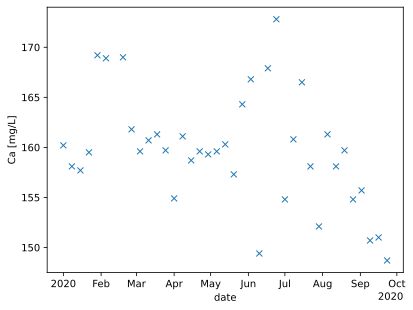

In [35]:

figure_Ca = plt.figure()
ax_Ca = figure_Ca.add_subplot(1,1,1)
ax_Ca.plot(ion_dataset_date["Ca [mg/L]"], "x")
ax_Ca.set_xlabel("date")
ax_Ca.set_ylabel("Ca [mg/L]");

#making it look nice
import matplotlib.dates as mdates
def format_ions(ax):
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
format_ions(ax_Ca)

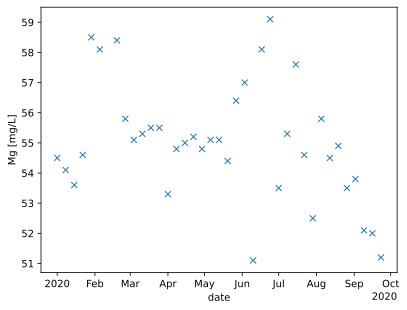

In [36]:
figure_Mg = plt.figure()
ax_Mg = figure_Mg.add_subplot(1,1,1)
ax_Mg.plot(ion_dataset_date["Mg [mg/L]"], "x")
ax_Mg.set_xlabel("date")
ax_Mg.set_ylabel("Mg [mg/L]");

format_ions(ax_Mg)

## General considerations

Most software can export files to CSV, so that is almost always our fall back option. Not all software is reasonable about how it exports to CSV, though.

### Rounding

First of all: in some cases, numeric precision might be reduced. Usually, that is not a problem, but if your previously smooth data suddenly has a steps after importing it into python, then that is what is likely happening:

(-0.1, 0.1)

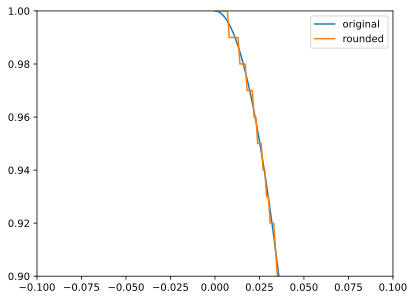

In [37]:
fig_prec = plt.figure()
ax_prec = fig_prec.add_subplot(111)
x = np.linspace(0,1,1000)
y = np.cos(4*np.pi*x)
ax_prec.plot(x,y, label="original")
ax_prec.plot(x,np.round(y,2), label="rounded")
ax_prec.legend()
ax_prec.set_ylim(0.9,1)
ax_prec.set_xlim(-.1,.1);

## Size and compression

Another draw back of CSVs is that they are quite inefficient and large. Zipping them for storage is probably a good idea. Numpy and pandas can both open gzipped CSVs as well. In windows, the software "7zip" can be used to create such files.

You can also check out the `zipfile` package in the python standard library if you want to access multiple zipped files in a zip archive. Here is an example how we can use `zipfile` to load CSVs from a zipped folder.

Again, we are using `with` blocks to work with files.

In [38]:
import zipfile

#create empty dictionary to hold data
loaded_files = dict()

#step 1: open the zip file 
with zipfile.ZipFile('data/zipped_csvs.zip', "r") as zipped_folder:
    
    #step 2: what is inside the zip file, 
    # returns list of zip info objects
    zipinfo = zipped_folder.infolist()
    
    #step 3: we only want files, not directories
    files = []
    for zi in zipinfo:
        if not zi.is_dir():
            files.append(zi.filename)
    
    print("The following files are in the zip file\n {}".format(files))
    
    #step 4: for loop over all files
    for fn in files:
        #step 5: open files to read
        with zipped_folder.open(fn) as zipped_file:
            loaded_files[fn] = np.genfromtxt(zipped_file,names=True )
            
#results:            
loaded_files

The following files are in the zip file
 ['files/day1.csv', 'files/day2.csv', 'files/day3.csv']


{'files/day1.csv': array([( 1.,  1.), ( 2.,  2.), ( 3.,  3.), ( 4.,  4.), ( 5.,  5.),
        ( 6.,  6.), ( 7.,  7.), ( 8.,  8.), ( 9.,  9.), (10., 10.)],
       dtype=[('time', '<f8'), ('signal', '<f8')]),
 'files/day2.csv': array([( 1., 3.), ( 2., 3.), ( 3., 3.), ( 4., 3.), ( 5., 4.), ( 6., 4.),
        ( 7., 4.), ( 8., 4.), ( 9., 4.), (10., 1.)],
       dtype=[('time', '<f8'), ('signal', '<f8')]),
 'files/day3.csv': array([( 1., 0.), ( 2., 0.), ( 3., 0.), ( 4., 0.), ( 5., 2.), ( 6., 2.),
        ( 7., 3.), ( 8., 4.), ( 9., 5.), (10., 6.)],
       dtype=[('time', '<f8'), ('signal', '<f8')])}

## How to not use CSVs

If it is at all possible, the best option is to load the original vendor files into python. This removes the tedious step of manually exporting to CSV, and keeps as much meta data as possible intact. However, unfortunately, not all vendors provide a python function to load their data and only for a few very popular formats someone has taken it upon themselves to write a python library that does it for you. Still, if you start working with anew file format, it is a good idea to google for a python library that opens the data.

If there is an open source third party library to open the data, there are a few things you can check, before installing it, to make sure you are not wasting your time. First, check if the package has a github or gitlab page (that is typically, were such libraries would be hosted). 

On that page, there are a few signs that point to a well maintained and functional library:

1. was there recently an update (recently depends a bit on the age of the project. For established libraries, it could mean within the last month or so). (green circle in the screen shot)
2. was there a (recent) release (orange circle). These could be every month to once in a few months, depending on the project.
3. Is there a useful documentation (pink circle). Before you install the package, read the intro of the documentation and try to figure out, which commands from the package you would use to perform the task you need.
4. Are there critical issues that haven't been addressed in a long time (red circle)? Are there no issues at all (nobody uses the package?)
5. Forks: popular and older packages are often forked many times by people who want to contribute to it, more forks point towards a more active community

![screenshot of pyteomics github](figures/loading_data/github.png)

Once you are sure that the library will work for your purpose, the next question is how you can install it. If you are using anaconda, then the optimal case is an installation using `conda`. If the developers have set up that option, they will typically say so in the documentation. Many times someone else has repackaged a library for anaconda. You can check that at https://anaconda.org/. 

If no Anaconda package exists, the next step is to try `pip` for installation (using the commands given in the package documentation).

Finally, if that doesn't exist either, you can download the package from github and install it using `python setup.py install`.

## Summary

1. CSVs are the file format of last resort
2. check the exact format of your CSV before you import (encoding, decimal separator, delimiter, rows/cols, nan)
3. zipped files can also be imported
4. use numpy for speed, pandas for more complex files
5. Excel/LibreOffice calc files can be opened using pandas
6. Check for open source libraries to open vendor files